In [1]:
from matplotlib import pyplot
%matplotlib inline

# Word embeddings and dimensionality reduction in NLP 

Dr. Ekaterina Chernyak,  
CS Faculty, Higher School of Economics 

echernyak@hse.ru

## Natural Language processing 

* is an area of AI, which is focused on processing human languages
* you use many NLP technologies in your every day life, such as web search, spell checking, voice recognition
* examples from NLP may help to illustrate some ML methods, such as dimensionality reduction, with simple examples 


## Today we are going to see

* how we can represent a word as vector 
* how we solve linear algebra equations on word vectors 

## Today we are going to use
* Vector Space Model for modeling words
* Word2Vec for dimensionality reduction 
* RandomForest for text classification


## Core NLP idea: Vector Space Model

Everything is a vector. A document $doc$ is a vector in the space of words:

\begin{equation*}
\vec{doc} = (f_1, \ldots, f_{|V|}), 
\end{equation*}

\begin{equation*}
V - vocabulary, word \in V
\end{equation*}


|   | $d_1$ | $d_2$   | $\ldots$  | $d_C$ |
|---|-------|---|---|----|
| $w_1$  |  $f_{11}$     |   $\ldots$ |   |    |
| $w_2$  |     $\ldots$   |   |   |    |
| $\ldots$  |       |   |   |    |
| $w_V$  |       |   |   | $f_{VC}$   |


\begin{equation*}
C - corpus, doc \in C
\end{equation*}

\begin{equation*}
f(word, doc) - \text{weight of}~word~\text{in}~doc
\end{equation*}

### Weightings 

* $f(word, doc) =
  \begin{cases}
    1 & \text{if}~word~\in~doc\\
    0, otherwise \\
  \end{cases}$


* $f(word, doc) = tf(word, doc) = \frac{\text{count}(word,doc)}{\sum_i \text{count}(word_i,doc) } $


* $f(word, doc) = \text{tf}(word, doc) \times \text{idf}(word) = $

= $\frac{\text{count}(word,doc)}{\sum_i \text{count}(word_i,doc) }  \times \log \frac{|C|}{\text{count}(doc | word \in doc)}$

$\vec{doc}$ can be used:
* as an input feature to any ML algorithm for further classification
* to compute similarity between documents

\begin{equation*}
\text{similarity}(d_i, d_j) = \text{cosine}(\vec{doc}_i, \vec{doc}_j)  = \frac{\sum_k f_{ki} f_{kj}}{\sqrt{\sum_k f_{ki}^2 } \sqrt{\sum_k f_{kj}^2 } }
\end{equation*}

![title](img/cos.png )

A word may be a vector in the space of documents, but usually $|C| << |V|$.

|   | $d_1$ | $d_2$   | $\ldots$  | $d_C$ |
|---|-------|---|---|----|
| $w_1$  |  $f_{11}$     |   $\ldots$ |   |    |
| $w_2$  |     $\ldots$   |   |   |    |
| $\ldots$  |       |   |   |    |
| $w_V$  |       |   |   | $f_{VC}$   |



A word is a vector in the space of contexts, i.e. neighbouring words (2 left and right words). 

In [2]:
# left and right contexts to the word "gravity"
from nltk.text import Text  
import re

regex = r'\w+'

gravity =  ' '.join(open('Gravity.txt').readlines())
tokens = re.findall(regex, gravity.lower())
txt = Text(tokens)
txt.concordance('gravity', lines = 10);

Displaying 10 of 89 matches:
                                    gravity for other uses see gravity disambig
                                    gravity disambiguation gravitation and law 
                                    gravity redirect here for other uses see gr
avitation disambiguation and law of gravity disambiguation gravity or gravitati
n and law of gravity disambiguation gravity or gravitation is a natural phenome
avitate toward one another on earth gravity gives weight to physical objects an
 to physical objects and the moon s gravity causes the ocean tides the gravitat
 to group together into galaxies so gravity is responsible for many of the larg
ge scale structures in the universe gravity has an infinite range although its 
reasingly weaker on farther objects gravity is most accurately described by the


|   | $c_1$ | $c_2$   | $\ldots$  | $c_V$ |
|---|-------|---|---|----|
| $w_1$  |  $f_{11}$     |   $\ldots$ |   |    |
| $w_2$  |     $\ldots$   |   |   |    |
| $\ldots$  |       |   |   |    |
| $w_V$  |       |   |   | $f_V$   |



### Weightings

* $f(word, context) =
  \begin{cases}
    1 & \text{if word occurs in context}\\
    0, otherwise \\
  \end{cases}$


* $f(word, context) = freq(word, context) = \frac{\text{count}(word,context)}{|D|}$, $D$ - all pairs ($word, context$)


* $f(word, context) = PPMI(word, context)
  \begin{cases}
    PMI(word, context) = \frac{\text{count}(word,context) |D|}{\text{count}(word), \text{count}(count)} \\
    0, otherwise \\
  \end{cases}$


Why PPMI?
* $freq$(the, cat) > $freq$(cute, cat)
* $PPMI$(the, cat) < $PPMI$(cute, cat)

### Problems
1. matrices are too sparse;
2. they do not reveal any syntactic or semantic similarities, i.e. words ``cat'' and ``dog'' might behave similar, but occur in different documents:

$cosine$(cat, dog) $\rightarrow 0$.

# Word embeddings

Each word is embedded into a $d$ dimensional space, and represented as a vector in that space:


\begin{equation*}
\vec{word}  \in \mathbb{R}^{|V|} \rightarrow \vec{e}_{word}\in \mathbb{R}^d
\end{equation*}


## Singular value decomposition


\begin{equation*}
M = U S V^{T},
\end{equation*}

where $M$ is a word-context matrix, $U$ is a matrix of left singular vectors, $S$ is a matrix of singular values, $V^T$ is a matrix of right singular values. 

After setting all but $d$ values of $S$ to zero, we multiply all $U_d S_d V^{T}_d$ and get the best approximation $M_d$ of matrix $M$ of rank $d$. 

Approximation of rank $d$: $M_d = U_d \times S_d \times v^{T}_d$



Embeddings: $U_d \times \sqrt{S_d}$



![title](img/svd.png)

The embeddings are used:
* to play with words and their semantics
* as input to a neural text processing system

![title](img/word2vec-gender-relation.png)

Quality of embeddings can be evaluated using standart datasets of synonyms and accosiactions and standart evaluation tasks. It is shown that SVD embeddings are slow and are not of the best quality.

* **finding synonyms**: find the closest words
* **association**: man : king = woman : queen 
* **leave one out**: cat dog fish cow pizza $\rightarrow$ pizza

## Word2vec architecture and principles

Word2vec is the most famous work on word embeddings and what you can do with them by  Mikolov et al.

Two architecturers:
* Continious bag of words
* Skip-gram

Two optimization algorithms:
* Negative sampling 
* Hierarchical softmax

Predict observed pairs (word, context) from $D$:

$P(D=1|word,context) = \frac{1}{1+e^{-s(word,context)}} \rightarrow  \max $

Do not predict observed pairs (word, context) from $\bar{D}$:

$P(D=0|word,context) = \frac{1}{1+e^{-s(word,context)}} \rightarrow \max $

$|\bar{D}|$ is large, hence sample $k$ pairs from $\bar{D}$

Let us bring it all together:   $L(D,\bar{D}) = P(D=1|word,context) + P(D=0|word,context)$

**Continious bag of words**: predict central word in context $c_{-2}, c_{-1},  c_{1}, c_{2}$

<img src="img/cbow.png" width="300">

$x$ are one-hot vectors of size $|V|$

hidden layer: $W \in \mathbb{R} ^ {V \times N}$ is a matrix of weights. 

$h = x^T W = v_{w}$ - vector representation of the input word

output layer: $W' \in \mathbb{R} ^ {N \times V}$ is a matrix of weights. 

$ u_j = v_{w}^{'T} h $ - score for each word in the vocabulary

$ p(w|c) = \frac{u_c}{\sum_j u_j}$ - softmax classification model is used to obtain the posterior distribution of words

loss function resembles of cross-entropy: $\max(w|c) = u_{c^*} - log \sum_{j \in V} exp(u_j)$

An embedding of $word_i$ is $\vec{word}_i = x \times W$, i.e. a row of weight matrix and is of dimensionality $N$. 

**Skip-gram**: predict context word, based on the given word, context words are independent 


loss function: $ - \log \prod \frac{ exp(u_{c,j*}) }{ \sum_{j'} exp(u_{j'})} = -\sum_j u_{c,j*} + C \log \sum_{j'} exp(u_{j'})  $


$x$ are one-hot vectors of size $|V|$,  $W \in \mathbb{R} ^ {V \times N}$ is a matrix of weights.  An embedding of $word_i$ is $\vec{word}_i = x \times W$, i.e. a row of weight matrix and is of dimensionality $N$. 




<img src="img/sgns.png" width="300">

# Gensim for Word2Vec

## Data

We downloaded ~50k abstracts on various Physics topics from arxiv.

The code below helps you to donload zipped abstracts from dropbox and unzip them.

In [3]:
#downloading the text corpus from Dropbox
url = "https://www.dropbox.com/s/2qe1mai9eyd4mqa/abstracts1.zip?dl=1"  # dl=1 is important


import urllib.request
u = urllib.request.urlopen(url)
data = u.read()
u.close()
 
with open("abstracts1.zip", "wb") as f :
    f.write(data)

In [4]:
#unziping the text corpus
import zipfile
zip_ref = zipfile.ZipFile("abstracts1.zip", 'r')
zip_ref.extractall("abstracts1")
zip_ref.close()

In [5]:
#reading the text corpus
import glob

abstracts = [open(infile).readlines()[0] for infile in glob.glob('abstracts1/*/*') if "__MACOSX" not in infile]
print(abstracts[0])

Trying to interpret B. Zilber's project on model theory of quantum mechanics we study a way of building limit models from finite-dimensional approximations. Our point of view is that of metric model theory, and we develop a method of taking ultraproducts of unbounded operators. We first calculate the Feynman propagator for the free particle as defined by physicists as an inner product $\langle x_{0}| K^{t}| x_{1}\rangle $ of the eigenvector $| x_{0}\rangle $ of the position operator with eigenvalue $x_{0}$ and $K^{t}(| x_{1}\rangle )$, where $K^{t}$ is the time evolution operator. However, due to a discretising effect, the eigenvector method does not work as expected, and without heavy case-by-case scaling, it gives the wrong value. We look at this phenomenon, and then complement this by showing how to instead calculate the kernel of the time evolution operator (for both the free particle and the harmonic oscillator) in the limit model. We believe that our method of calculating these i

In [6]:
#total number of documents 
len(abstracts)

52428

## Text tokenization

In [7]:
#we need to split the text in tokens, i.e. words
import re

regex = r'\w+'

abstracts = [re.findall(regex, abstract.lower()) for abstract in abstracts]
print(abstracts[0])

['trying', 'to', 'interpret', 'b', 'zilber', 's', 'project', 'on', 'model', 'theory', 'of', 'quantum', 'mechanics', 'we', 'study', 'a', 'way', 'of', 'building', 'limit', 'models', 'from', 'finite', 'dimensional', 'approximations', 'our', 'point', 'of', 'view', 'is', 'that', 'of', 'metric', 'model', 'theory', 'and', 'we', 'develop', 'a', 'method', 'of', 'taking', 'ultraproducts', 'of', 'unbounded', 'operators', 'we', 'first', 'calculate', 'the', 'feynman', 'propagator', 'for', 'the', 'free', 'particle', 'as', 'defined', 'by', 'physicists', 'as', 'an', 'inner', 'product', 'langle', 'x_', '0', 'k', 't', 'x_', '1', 'rangle', 'of', 'the', 'eigenvector', 'x_', '0', 'rangle', 'of', 'the', 'position', 'operator', 'with', 'eigenvalue', 'x_', '0', 'and', 'k', 't', 'x_', '1', 'rangle', 'where', 'k', 't', 'is', 'the', 'time', 'evolution', 'operator', 'however', 'due', 'to', 'a', 'discretising', 'effect', 'the', 'eigenvector', 'method', 'does', 'not', 'work', 'as', 'expected', 'and', 'without', 'he

## Stop word removal

In [8]:
#download stopwords from NLTK server
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [38]:
#stopwords
from nltk.corpus import stopwords
mystopwords = stopwords.words('english') + ['ueds', 'ued']
print(mystopwords) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
#stopwords removal
abstracts = [[word for word in abstract if word not in mystopwords] for abstract in abstracts]
print(abstracts[0])

['trying', 'interpret', 'b', 'zilber', 'project', 'model', 'theory', 'quantum', 'mechanics', 'study', 'way', 'building', 'limit', 'models', 'finite', 'dimensional', 'approximations', 'point', 'view', 'metric', 'model', 'theory', 'develop', 'method', 'taking', 'ultraproducts', 'unbounded', 'operators', 'first', 'calculate', 'feynman', 'propagator', 'free', 'particle', 'defined', 'physicists', 'inner', 'product', 'langle', 'x_', '0', 'k', 'x_', '1', 'rangle', 'eigenvector', 'x_', '0', 'rangle', 'position', 'operator', 'eigenvalue', 'x_', '0', 'k', 'x_', '1', 'rangle', 'k', 'time', 'evolution', 'operator', 'however', 'due', 'discretising', 'effect', 'eigenvector', 'method', 'work', 'expected', 'without', 'heavy', 'case', 'case', 'scaling', 'gives', 'wrong', 'value', 'look', 'phenomenon', 'complement', 'showing', 'instead', 'calculate', 'kernel', 'time', 'evolution', 'operator', 'free', 'particle', 'harmonic', 'oscillator', 'limit', 'model', 'believe', 'method', 'calculating', 'new']


## Word2vec training

In [10]:
#training word2vec model
from gensim.models import Word2Vec

model = Word2Vec(abstracts, size=300, window=5, min_count=5, iter=10)
model.init_sims(replace = True)
model.save("word2vec.model")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Word embeddings

Word embedding is a dense vector

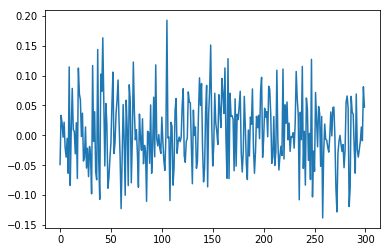

In [11]:
pyplot.plot(model['mechanics']);

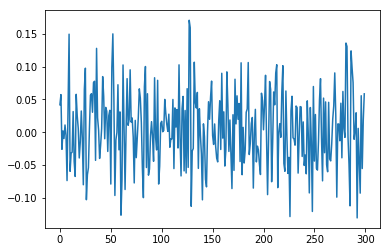

In [12]:
pyplot.plot(model['optics']);

### Nearest neighbours

* Find top-10 closest words to the given one
* Use cosine similarity to compute similarities between all word, select top-10

In [13]:
#nearest neighbours to the word "temperature"
model.wv.most_similar('temperature')

[('temperatures', 0.7543298602104187),
 ('magnetization', 0.4682762026786804),
 ('pressures', 0.46097511053085327),
 ('conductivity', 0.4423263967037201),
 ('t_c', 0.42489132285118103),
 ('pressure', 0.41305258870124817),
 ('metallicity', 0.38723671436309814),
 ('density', 0.3856908082962036),
 ('thickness', 0.3842187225818634),
 ('altitude', 0.38063037395477295)]

In [14]:
#nearest neighbours to the word "frequency"
model.wv.most_similar('frequency')

[('frequencies', 0.7726234793663025),
 ('wavenumbers', 0.5015590190887451),
 ('qpos', 0.45070868730545044),
 ('intensity', 0.4470783770084381),
 ('mhz', 0.44440633058547974),
 ('wavenumber', 0.43795937299728394),
 ('multipoles', 0.4367868900299072),
 ('bandwidth', 0.43575620651245117),
 ('amplitude', 0.43399113416671753),
 ('khz', 0.4281695783138275)]

In [15]:
#we can sum up find nearest neighbours to the sum of vectors
model.wv.most_similar(positive=['spacetime', 'inflation'])

[('universes', 0.5921310782432556),
 ('inflationary', 0.5823163390159607),
 ('spacetimes', 0.5673341155052185),
 ('cosmologies', 0.5541108846664429),
 ('metric', 0.546611487865448),
 ('inflaton', 0.5413949489593506),
 ('preheating', 0.5375071167945862),
 ('frw', 0.500413715839386),
 ('curvaton', 0.4900591969490051),
 ('robertson', 0.48074865341186523)]

### Word association
* Solve equatations, such as man : king = woman : ?
* Use linear algebra: $\vec{\text{king}} - \vec{\text{man}} + \vec{\text{woman}}$ and get a point somewhere in word2vec space
* Find the closest word to this point

In [16]:
# proton : positive = electron : ?
model.wv.most_similar(positive=['positive', 'electron'], negative=['proton'])

[('negative', 0.5546582341194153),
 ('vanishes', 0.3948664665222168),
 ('nonzero', 0.3776363730430603),
 ('unbounded', 0.36147066950798035),
 ('everywhere', 0.3520873188972473),
 ('quantized', 0.33164846897125244),
 ('discontinuity', 0.33045369386672974),
 ('definite', 0.329897403717041),
 ('acquires', 0.3247013986110687),
 ('vanishing', 0.319676011800766)]

In [17]:
#vector arithmetics 
vec = (model.wv['positive']  - model.wv['proton'] + model.wv['electron'])/3

model.wv.similar_by_vector(vec)

[('positive', 0.7074775099754333),
 ('negative', 0.5546582341194153),
 ('electron', 0.40388405323028564),
 ('vanishes', 0.394866406917572),
 ('nonzero', 0.3776363730430603),
 ('unbounded', 0.36147066950798035),
 ('everywhere', 0.3520873188972473),
 ('quantized', 0.33164846897125244),
 ('discontinuity', 0.33045369386672974),
 ('definite', 0.329897403717041)]

In [18]:
# morphological analogy
model.wv.most_similar(positive=['frequency', 'temperature'], negative=['temperatures'])

[('frequencies', 0.5032691359519958),
 ('amplitude', 0.4474259614944458),
 ('intensity', 0.43377169966697693),
 ('detuning', 0.4265994131565094),
 ('wavenumber', 0.3843083083629608),
 ('sensitively', 0.3782108426094055),
 ('strain', 0.37791869044303894),
 ('multipole', 0.3692620098590851),
 ('wavenumbers', 0.36166033148765564),
 ('quadrupolar', 0.36042189598083496)]

In [19]:
# more analogies
model.wv.most_similar(positive=['molecule', 'galaxy'], negative=['star'])

[('atomic', 0.46888023614883423),
 ('electronic', 0.42846381664276123),
 ('rydberg', 0.428318053483963),
 ('molecules', 0.42275309562683105),
 ('nv', 0.4032125771045685),
 ('impurities', 0.4009053111076355),
 ('bonds', 0.39911413192749023),
 ('diatomic', 0.3976646065711975),
 ('atoms', 0.39609554409980774),
 ('hyperfine', 0.38789117336273193)]

### Leave one out
* Compute average pairwise distances between all words
* Choose that word, that is further from other words

In [40]:
#leave one out test 
model.wv.doesnt_match(['optics', 'astrophysics', 'acoustics' ,'cosmos'])

'cosmos'

### Word embedding visualization
* Use TSNE to project all word embeddings (or embeddings of the most frequent words) on 2D space
* Each word is a dot on 2D space

In [21]:
#compute word frequency
from collections import Counter

cnt = Counter()
for abstract in abstracts:
    cnt.update(abstract)

In [22]:
#select top 5k words
terms = [i[0] for i in cnt.most_common(5000) ]

In [23]:
#select vectors for top 5k words
terms_vec = model[terms]

In [24]:
#use TSNE for projection on 2D space
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
terms_tsne = tsne.fit_transform(terms_vec)

In [25]:
#plot TSNE
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()


source = ColumnDataSource(data=dict(x1=terms_tsne[:,0],
                                    x2=terms_tsne[:,1],
                                    labels = terms))

hover = HoverTool(tooltips = [("label","@labels")])

p = figure(title="TSNE for terms", tools = [hover])



p.scatter(x="x1", y="x2", size=3, source=source)



Loading BokehJS ...

GlyphRenderer(id='8a037ba6-fd05-45a0-beca-f535fea52361', ...)

In [26]:
#plot TSNE
from bokeh.plotting import save
output_file('tsne.html', mode = "inline")
save(p)

'/NLP/lectures/2018/nlp-mlhep/tsne.html'

### Word embedding clustering

* Use any clustering algorirthm to cluster word embeddings
* Plot the clusters 

In [27]:
#compute distance matrix
from sklearn.metrics.pairwise import cosine_similarity
#compute distance matrixdist = 1 - cosine_similarity(terms_vec)

In [28]:
#hierarchal clustering of distance matrix
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

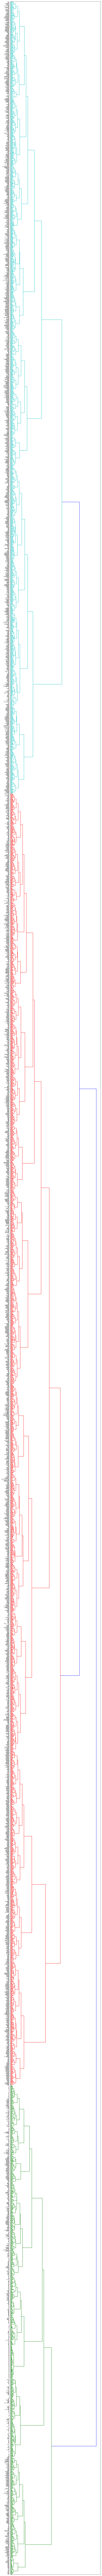

In [29]:
#plot dendrogram
fig, ax = pyplot.subplots(figsize=(10, 250)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=terms);

pyplot.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

pyplot.tight_layout() 

pyplot.savefig('w2v_clusters.png', dpi=200) #save figure as ward_clusters

### Text classification

Ok, word embeddings are awesome, and we can use them for text classification.

In [30]:
#create dataset for classification
import pandas as pd

topics = [infile.split('/')[1] for infile in glob.glob('abstracts1/*/*') if "__MACOSX" not in infile]
data = zip(topics, abstracts)
df = pd.DataFrame.from_records(data, columns = ['topic', 'text'])
df.head()

,topic,text
0,math.LO,"[trying, interpret, b, zilber, project, model,..."
1,math.LO,"[paper, discuss, notion, logically, perfect, s..."
2,math.LO,"[known, set, closed, linear, subspaces, hilber..."
3,math.LO,"[probabilistic, propositional, logic, endowed,..."
4,q-fin.GN,"[decentralized, online, quantum, cash, system,..."


In [31]:
#create dataset for classification
df = df[df.topic.isin(['astro-ph', 'hep-ex', 'hep-lat', 'hep-ph', 'physics.ins-det', 'quant-ph', 'math-ph',
                      'nucl-ex', 'astro-ph.HE' ])]

corpus_sample_train = pd.DataFrame(columns=df.columns)
corpus_sample_test = pd.DataFrame(columns=df.columns)

for topic in df.topic.unique():
    corpus_sample = df[df.topic==topic].sample(500)
    corpus_sample_train = corpus_sample_train.append(corpus_sample.iloc[:400, :])
    corpus_sample_test = corpus_sample_test.append(corpus_sample.iloc[400:, :])

In [32]:
#create dataset for classification
X_train = corpus_sample_train.text.tolist()
X_test = corpus_sample_test.text.tolist()

y_train = corpus_sample_train.topic.tolist()
y_test = corpus_sample_test.topic.tolist()

The simplest way to build features for text classification is by averaging word vectors for all words in a text. We will build a sklearn-compatible transformer that is initialised with a word -> vector dictionary.

In [42]:
# text = sum(word vector) / len(text)

import numpy as np
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

We can weight word embeddings using $tf-idf$ weightening. 

In [34]:
# text = sum(tfidf(word) * word vector) / len(text)

from sklearn.feature_extraction.text import *
from collections import Counter, defaultdict

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [35]:
# transform w2v model
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [36]:
# two pipelines for text classification
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])
rfc_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

In [43]:
# predictions for Pipeline 1
rfc_w2v.fit(X_train,y_train)
pred = rfc_w2v.predict(X_test)

In [44]:
from sklearn.metrics import *
import matplotlib.pyplot as plt

print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_

Precision:   0.74
Recall:   0.74
F1-measure:   0.73
Accuracy:   0.74
                 precision    recall  f1-score   support

       astro-ph       0.72      0.75      0.74       100
    astro-ph.HE       0.74      0.67      0.71       100
         hep-ex       0.69      0.66      0.68       100
        hep-lat       0.74      0.81      0.77       100
         hep-ph       0.67      0.51      0.58       100
        math-ph       0.75      0.83      0.79       100
        nucl-ex       0.72      0.79      0.76       100
physics.ins-det       0.76      0.87      0.81       100
       quant-ph       0.82      0.75      0.78       100

    avg / total       0.74      0.74      0.73       900



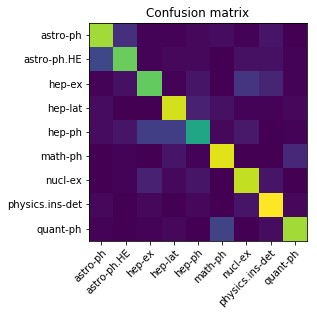

In [45]:
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix(y_test, pred))

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))


ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title("Confusion matrix")
plt.show()

In [49]:
# predictions for Pipeline 2

rfc_w2v_tfidf.fit(X_train,y_train)
pred = rfc_w2v_tfidf.predict(X_test)

In [50]:
from sklearn.metrics import *
import matplotlib.pyplot as plt

print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_

Precision:   0.78
Recall:   0.78
F1-measure:   0.77
Accuracy:   0.78
                 precision    recall  f1-score   support

       astro-ph       0.77      0.78      0.78       100
    astro-ph.HE       0.81      0.74      0.77       100
         hep-ex       0.74      0.73      0.74       100
        hep-lat       0.78      0.83      0.80       100
         hep-ph       0.73      0.56      0.63       100
        math-ph       0.78      0.83      0.80       100
        nucl-ex       0.76      0.84      0.80       100
physics.ins-det       0.77      0.89      0.83       100
       quant-ph       0.83      0.78      0.80       100

    avg / total       0.78      0.78      0.77       900



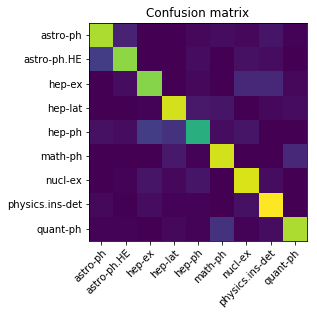

In [51]:
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix(y_test, pred))

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))


ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.title("Confusion matrix")
plt.show()

### To sum up
* VSM is used to model document and words
* Word embedding models are used for dimensionality reduction
* word2vec is NOT deep learning and NOT a single architecture
* SGNS is the preferable configuration of word2vec
* We can compute text vectors too, by averaging word embeddings 

### What's next?
* Other word embeddings models (GloVe, StarSpace, AdaGram, word2vec-f)
* Advanced text preprocessing (lemmatization, stemming)
* Read the Levi and Goldberg proof of word2vec being equal to SVD of PPMI-k matrix

### References
1. Mikolov, Tomas, Kai Chen, Greg Corrado, and Jeffrey Dean. "Efficient estimation of word representations in vector space." arXiv preprint arXiv:1301.3781 (2013).
2. Levy, Omer, and Yoav Goldberg. "Neural word embedding as implicit matrix factorization." In Advances in neural information processing systems, pp. 2177-2185. 2014.
3. Turney, Peter D., and Patrick Pantel. "From frequency to meaning: Vector space models of semantics." Journal of artificial intelligence research 37 (2010): 141-188.
4. Pennington, Jeffrey, Richard Socher, and Christopher Manning. "Glove: Global vectors for word representation." In Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP), pp. 1532-1543. 2014.
5. Goldberg, Yoav. "Neural network methods for natural language processing." Synthesis Lectures on Human Language Technologies 10, no. 1 (2017): 1-309.
6. Yang-Hui He, Vishnu Jejjala, Brent D. Nelson, "hep-th", https://arxiv.org/abs/1807.00735